In [1]:
%matplotlib inline
import csv, os, time, glob
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from itertools import combinations
np.set_printoptions(precision=4, suppress=True, linewidth=120)
from pandas.tseries.offsets import MonthEnd
import warnings
warnings.filterwarnings('ignore')
import math
from pandas_datareader.data import DataReader
from pandas.tools.plotting import table

In [2]:
import numpy as np
import pandas as pd

import statsmodels
from statsmodels.tsa.stattools import coint
# just set the seed for the random number generator
np.random.seed(107)

import matplotlib.pyplot as plt

In [3]:
# # Install a pip package in the current Jupyter kernel
# import sys
# !{sys.executable} -m pip install pykalman

In [4]:
##### import the necessary modules and set chart style####
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
mpl.style.use('bmh')
import pandas_datareader.data as web
import matplotlib.pylab as plt
from datetime import datetime
import statsmodels.api as sm
from pykalman import KalmanFilter
from math import sqrt
import re

In [5]:
def data_set_create(stock_list,data):
    temp_ = data[stock_list[0]]
    for i in range(1,len(list(stock_list))):
        temp_ = temp_.merge(data[stock_list[i]], left_on='Date', right_on='Date')

    temp_ = temp_.set_index('Date')
    return temp_


In [6]:
data_dir = "../indices/"
data_dir = "../indices_daily/"
data_dir = "../indices_quandl/"

files__ = pd.read_csv('../indices_details.csv')


sector_list_name =[]
sector_list =[]
for i in files__['Description'].unique():
    sector_list.append(list(files__['symbol'][files__['Description']==i]))
    sector_list_name.append(i)

In [25]:
#files__

In [8]:
commodity_list = list(files__['symbol'][files__['related_1st_pair']<6])
forex_list = list(files__['symbol'][files__['related_1st_pair']==6])
exchange_list = list(files__['symbol'][files__['related_1st_pair']==7])

In [9]:
#data_assets_monthly ={}
data_assets_daily ={}

In [10]:
# Daily
for i in list(files__['files']):
#for i in ['S&P 500 Contract (US500)']:
    temp_= pd.read_csv(data_dir+i+'.csv')[['Date','Price']]
    temp_['Date'] = pd.to_datetime(temp_['Date'])
    temp_ = temp_.set_index('Date')
    temp_= temp_.resample('1D', label='right').agg({files__['symbol'][files__['files']==i].item():'ohlc'})
    temp_ = temp_.fillna(method='ffill')
    temp_ = temp_[files__['symbol'][files__['files']==i].item()]['Price'][['close']]
    temp_ = temp_.rename(columns={'close':files__['symbol'][files__['files']==i].item()})
    temp_ = temp_.reset_index()      
    temp_['Date'] =pd.to_datetime(temp_['Date'])     
    #temp_ = temp_.set_index('Date')
    data_assets_daily[files__['symbol'][files__['files']==i].item()] = temp_

In [ ]:
# # Monthly
# for i in list(files__['files']):
# #for i in ['S&P 500 Contract (US500)']:
#     temp_= pd.read_csv(data_dir+i+'.csv')[['Date','Price']]
#     temp_['Date'] = pd.to_datetime(temp_['Date'])
#     temp_ = temp_.set_index('Date')
#     temp_= temp_.resample('1M', label='right').agg({files__['symbol'][files__['files']==i].item():'ohlc'})
#     temp_ = temp_.fillna(method='ffill')
#     temp_ = temp_[files__['symbol'][files__['files']==i].item()]['Price'][['close']]
#     temp_ = temp_.rename(columns={'close':files__['symbol'][files__['files']==i].item()})
#     temp_ = temp_.reset_index()      
#     temp_['Date'] =pd.to_datetime(temp_['Date'])     
#     #temp_ = temp_.set_index('Date')
#     data_assets_monthly[files__['symbol'][files__['files']==i].item()] = temp_

In [23]:
commodity_pairs = pd.read_csv('./plots/commodity portfolio returns table.csv')
exchange_pairs = pd.read_csv('./plots/Exchange portfolio returns table.csv')
exchange_pairs=exchange_pairs.fillna(1)
dta = commodity_pairs.merge(exchange_pairs, left_on='Date', right_on='Date',how='inner')
dta['Date'] =pd.to_datetime(dta['Date']) 
dta = dta.set_index('Date')

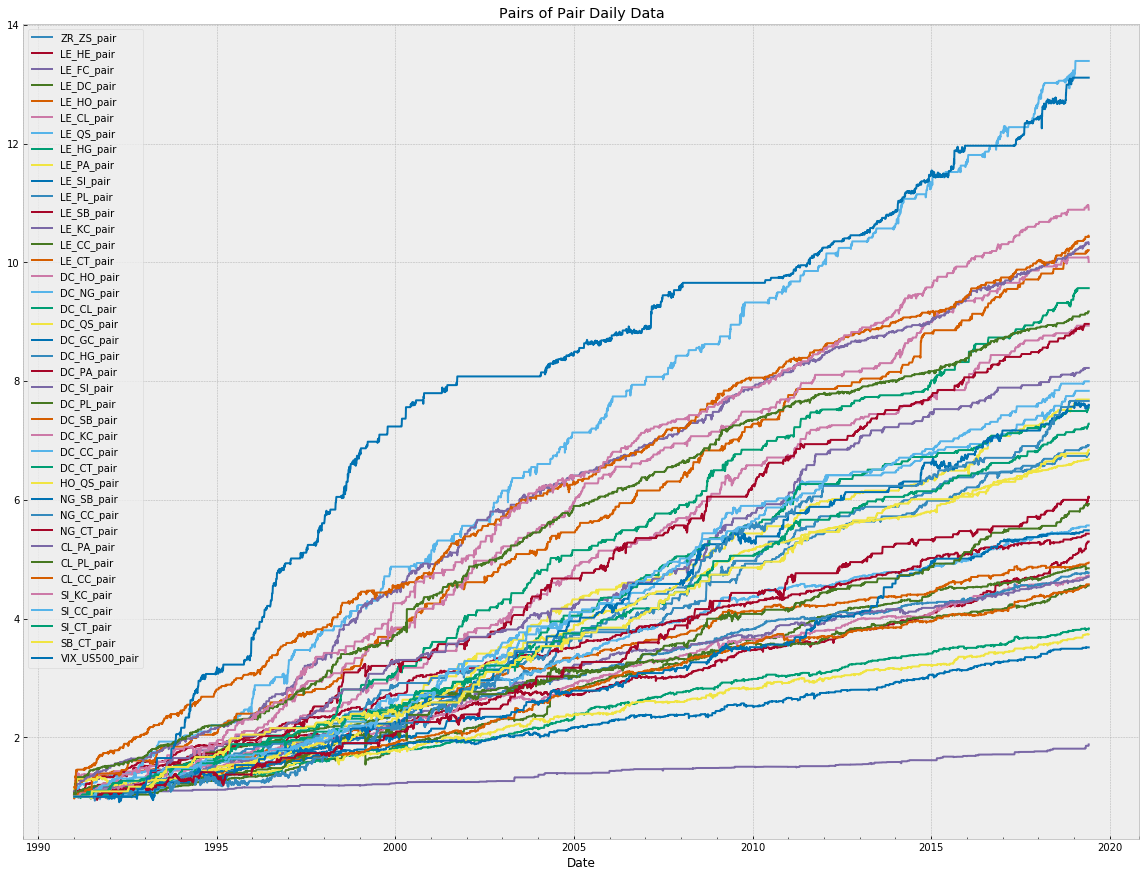

In [28]:
plot_ = dta.plot(figsize=(20,15), title ='Pairs of Pair Daily Data')
fig_ = plot_.get_figure()
fig_.savefig("./plots/pairs_of_pair_Daily_Data.png")

In [29]:
def pick_cointegrated_pairs(dataframe, critial_level = 5):
    n = dataframe.shape[1]
    pvalues_ = np.ones((n, n))
    keys = dataframe.columns
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            stock1 = dataframe[keys[i]]
            stock2 = dataframe[keys[j]]
            result = sm.tsa.stattools.coint(stock1, stock2)
            pvalue = result[1]
            pvalues_[i, j] = pvalue
            if pvalue < (critial_level/100):
                pairs.append((keys[i], keys[j], pvalue))
    return pvalues_, pairs

In [30]:
split = int(len(dta) * .4)

In [31]:
pvalues_,pairs = pick_cointegrated_pairs(dta[:split])

In [32]:
pvalues_df = pd.DataFrame(pvalues_)

In [34]:
pvalues_df

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,1.0,0.521451,0.145479,0.548607,0.301251,0.084446,0.865746,0.194663,0.322170,0.243849,...,0.879811,0.358632,0.579078,0.548383,0.147396,0.526210,0.915715,0.531457,0.825313,0.661667
1,1.0,1.000000,0.357007,0.146938,0.663867,0.619752,0.661178,0.286993,0.168044,0.762318,...,0.270142,0.088381,0.386081,0.495008,0.337027,0.166944,0.401229,0.047711,0.119365,0.251612
2,1.0,1.000000,1.000000,0.141634,0.729643,0.667997,0.868564,0.046401,0.099685,0.020686,...,0.348455,0.056046,0.314360,0.593186,0.266374,0.053727,0.646869,0.097130,0.199030,0.004759
3,1.0,1.000000,1.000000,1.000000,0.000090,0.000004,0.022568,0.695341,0.180815,0.936123,...,0.222749,0.018656,0.151314,0.003738,0.252888,0.023340,0.313440,0.289939,0.849205,0.977144
4,1.0,1.000000,1.000000,1.000000,1.000000,0.063052,0.000506,0.666081,0.407993,0.991294,...,0.007157,0.000188,0.221269,0.118602,0.876118,0.220522,0.127964,0.648875,0.861205,0.992031
5,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.032791,0.382354,0.131029,0.961355,...,0.113038,0.000852,0.007706,0.063407,0.671368,0.000345,0.074476,0.254427,0.630657,0.521461
6,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.965702,0.805128,0.993891,...,0.018690,0.007210,0.155768,0.064138,0.937228,0.496456,0.377484,0.702944,0.931960,1.000000
7,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.119749,0.247932,...,0.646344,0.054865,0.713830,0.688046,0.009468,0.340654,0.864655,0.199409,0.659696,0.188741
8,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.707550,...,0.467107,0.023279,0.525476,0.337103,0.078507,0.163332,0.650185,0.125021,0.626926,0.653887
9,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.912021,0.436347,0.906886,0.957883,0.713901,0.711578,0.954108,0.808039,0.808888,0.074348


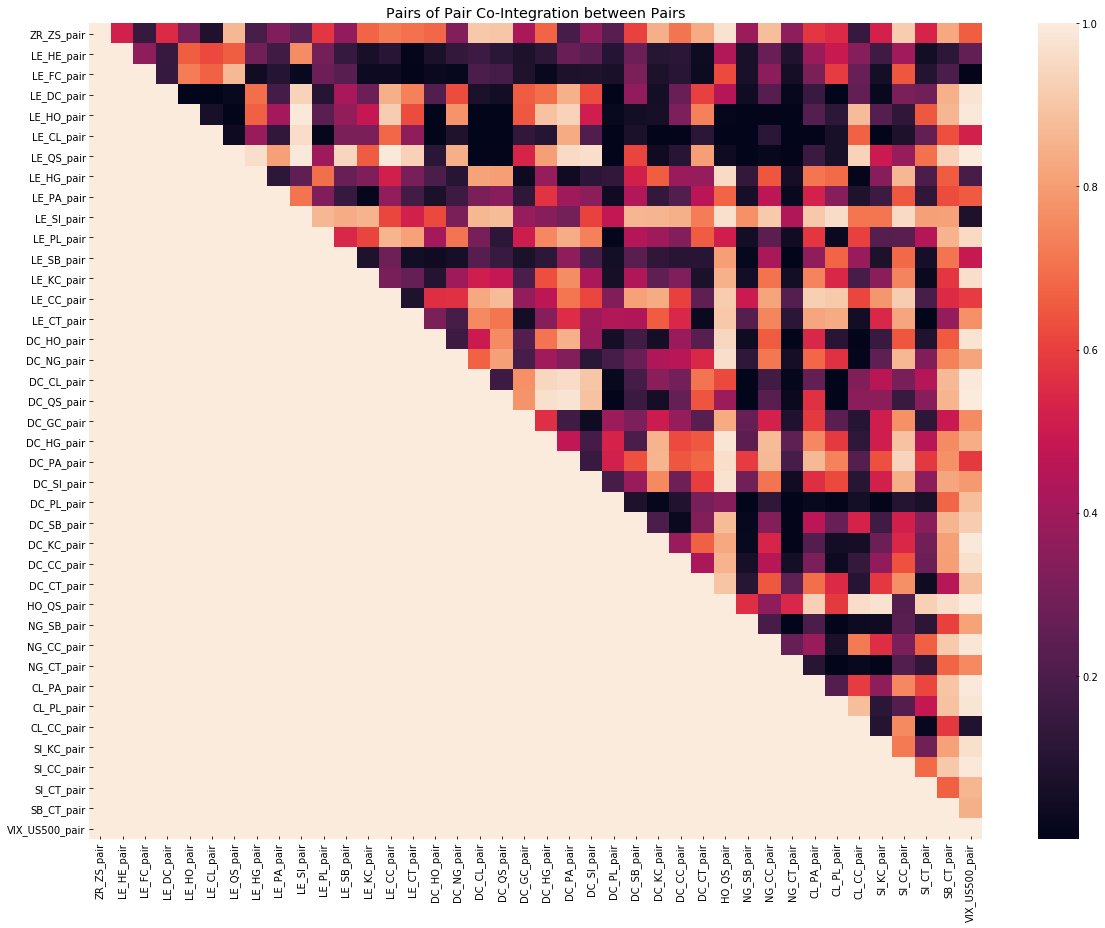

In [39]:
fig, ax = plt.subplots(figsize=(20,15))
plot_ = sns.heatmap(pvalues_df,xticklabels=list(dta.columns),yticklabels=list(dta.columns),ax=ax).set_title('Pairs of Pair Co-Integration between Pairs')
fig_ = plot_.get_figure()
fig_.savefig("./plots/pairs_of_pair_Co-Integration_between_Pairs.png")

In [40]:
pair_to_pairtrading =[]
for pair in pairs:
    #print("Stock {} and stock {} has a co-integration score of {}".format(pair[0],pair[1],round(pair[2],4)))
    pair_to_pairtrading.append("Stock {} and stock {} has a co-integration score of {}".format(pair[0],pair[1],round(pair[2],4)))

In [41]:
len(pair_to_pairtrading)

110

In [42]:
pd.DataFrame(pairs, columns =['stock_1','stock_2','Co-integration']).to_html('./plots/pairs_of_pair co-integration score table.html')


In [43]:
def KalmanFilterAverage(x):

    kf = KalmanFilter(transition_matrices = [1],
    observation_matrices = [1],
    initial_state_mean = 0,
    initial_state_covariance = 1,
    observation_covariance=1,
    transition_covariance=.01)
    state_means, _ = kf.filter(x.values)
    state_means = pd.Series(state_means.flatten(), index=x.index)
    return state_means

def KalmanFilterRegression(x,y):
    delta = 1e-3
    trans_cov = delta / (1 - delta) * np.eye(2)
    obs_mat = np.expand_dims(np.vstack([[x], [np.ones(len(x))]]).T, axis=1)

    kf = KalmanFilter(n_dim_obs=1, n_dim_state=2,
    initial_state_mean=[0,0],
    initial_state_covariance=np.ones((2, 2)),
    transition_matrices=np.eye(2),
    observation_matrices=obs_mat,
    observation_covariance=1,
    transition_covariance=trans_cov)
    state_means, state_covs = kf.filter(y.values)
    return state_means

def half_life(spread):
    spread_lag = spread.shift(1)
    spread_lag.iloc[0] = spread_lag.iloc[1]
    spread_ret = spread - spread_lag
    spread_ret.iloc[0] = spread_ret.iloc[1]
    spread_lag2 = sm.add_constant(spread_lag)
    model = sm.OLS(spread_ret,spread_lag2)
    res = model.fit()
    halflife = int(round(-np.log(2) / res.params[1],0))

    if halflife <= 0:
        halflife = 1
    return halflife

In [44]:
def backtest(df,S1, S2):

    x = df[S1]
    y = df[S2]

    df1 = pd.DataFrame({'y':y,'x':x})
    df1.index = pd.to_datetime(df1.index)
    state_means = KalmanFilterRegression(KalmanFilterAverage(x),KalmanFilterAverage(y))

    df1['hedge_ratio'] = - state_means[:,0]
    df1['spread'] = df1.y + (df1.x * df1.hedge_ratio)

    halflife = half_life(df1['spread'])

    meanSpread = df1.spread.rolling(window=halflife).mean()
    stdSpread = df1.spread.rolling(window=halflife).std()
    df1['zScore'] = (df1.spread-meanSpread)/stdSpread


    entryZscore = 2
    exitZscore = 0

    df1['long entry'] = ((df1.zScore < - entryZscore) & ( df1.zScore.shift(1) > - entryZscore))
    df1['long exit'] = ((df1.zScore > - exitZscore) & (df1.zScore.shift(1) < - exitZscore))
    df1['num units long'] = np.nan 
    df1.loc[df1['long entry'],'num units long'] = 1 
    df1.loc[df1['long exit'],'num units long'] = 0 
    df1['num units long'][0] = 0 
    df1['num units long'] = df1['num units long'].fillna(method='pad') 
    df1['short entry'] = ((df1.zScore > entryZscore) & ( df1.zScore.shift(1) < entryZscore))
    df1['short exit'] = ((df1.zScore < exitZscore) & (df1.zScore.shift(1) > exitZscore))
    df1.loc[df1['short entry'],'num units short'] = -1
    df1.loc[df1['short exit'],'num units short'] = 0
    df1['num units short'][0] = 0
    df1['num units short'] = df1['num units short'].fillna(method='pad')

    df1['numUnits'] = df1['num units long'] + df1['num units short']
    df1['spread pct ch'] = (df1['spread'] - df1['spread'].shift(1)) / ((df1['x'] * abs(df1['hedge_ratio'])) + df1['y'])
    df1['portfolio_rets'] = df1['spread pct ch'] * df1['numUnits'].shift(1)

    df1['cummulative_rets'] = df1['portfolio_rets'].cumsum()
    df1['cummulative_rets'] = df1['cummulative_rets'] + 1


    try:
        sharpe = ((df1['portfolio_rets'].mean() / df1['portfolio_rets'].std()) * sqrt(252))
    except ZeroDivisionError:
        sharpe = 0.0

    start_val = 1
    end_val = df1['cummulative_rets'].iat[-1]

    start_date = df1.iloc[0].name
    end_date = df1.iloc[-1].name

    days = (end_date - start_date).days

    CAGR = round(((float(end_val) / float(start_val)) ** (252.0/days)) - 1,4)

    df1[S1+"_"+S2+"_pair"] = df1['cummulative_rets']
    df1["sharpe"] = sharpe
    df1["CAGR"] = CAGR
    #df1[S1] = df1['x']
    #df1[S2] = df1['y']
    df1 = df1.rename(columns={'x':S1,'y':S2})
    
    return df1[S1+"_"+S2+"_pair"], sharpe, CAGR, df1

In [45]:
results = []
results_portfolio =[]
results_data_frame = []
pair_names = []
pair_table = []
h=1
for pair in pairs:
    print (h)
    rets, sharpe,  CAGR, data_frame = backtest(dta,pair[0],pair[1])
    if sharpe > 1:
        pair_table.append((pair[0],pair[1],round(sharpe,2),round(CAGR,4)))
        pair_names.append(pair[0]+'_'+pair[1])
        results_data_frame.append(data_frame)
        results.append(rets)
        #print("The pair {} and {} produced a Sharpe Ratio of {} and a CAGR of {}".format(pair[0],pair[1],round(sharpe,2),round(CAGR,4)))
        results_portfolio.append(("The pair {} and {} produced a Sharpe Ratio of {} and a CAGR of {}".format(pair[0],pair[1],round(sharpe,2),round(CAGR,4))))
        #rets.plot(figsize=(20,15),legend=True)
#         break
    h =h+1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110


In [46]:
pd.DataFrame(pair_table, columns =['stock_1','stock_2','Sharpe Ratio','CAGR']).to_html('./plots/pairs_of_pair sharpe CAGR table.html')
pd.DataFrame(pair_table, columns =['stock_1','stock_2','Sharpe Ratio','CAGR']).to_csv('./plots/pairs_of_pair sharpe CAGR table.csv')

In [47]:
portfoilio_returns = pd.DataFrame(results).T
pd.DataFrame(results).T.to_html('./plots/pairs_of_pair portfolio returns table.html')
pd.DataFrame(results).T.to_csv('./plots/pairs_of_pair portfolio returns table.csv')

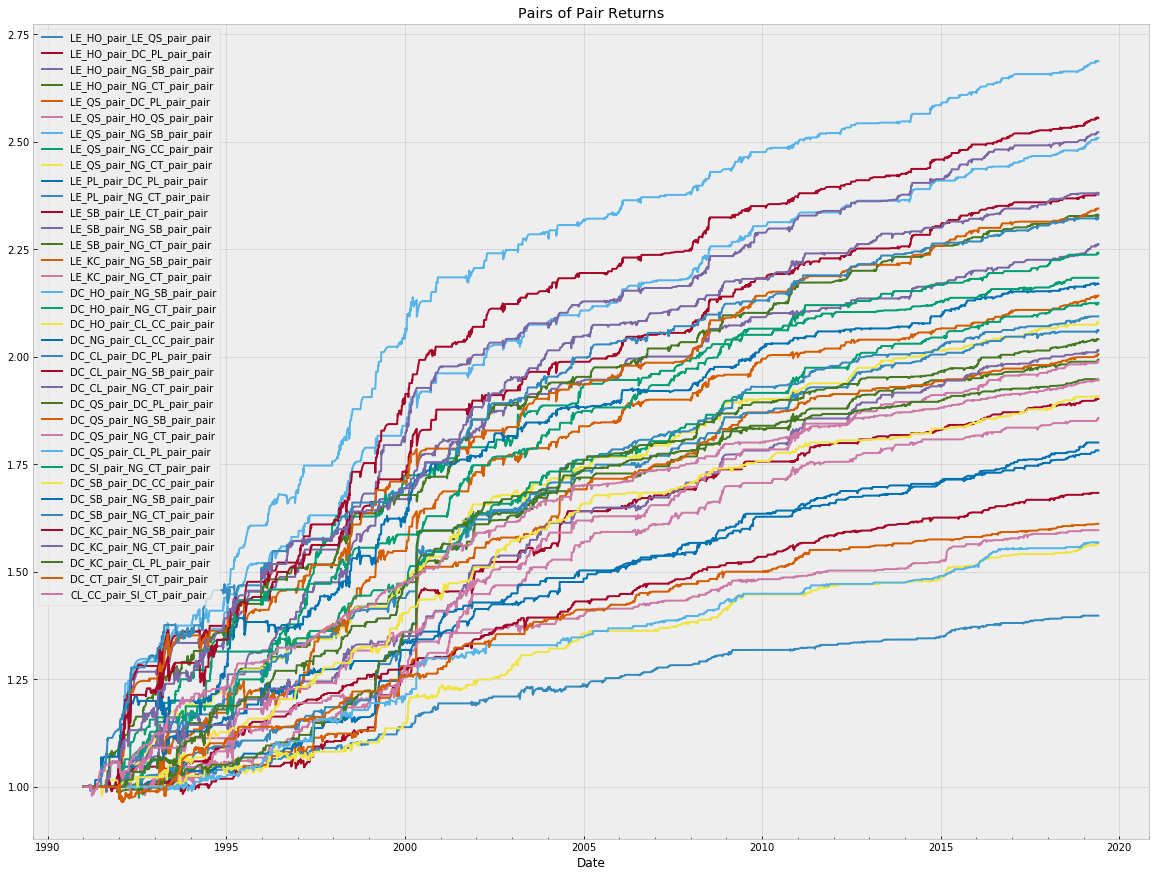

In [49]:
plot_ = portfoilio_returns.plot(figsize=(20,15),legend=True, title ='Pairs of Pair Returns')
fig_ = plot_.get_figure()
fig_.savefig("./plots/pairs_of_pair_Pairs_Returns.png")

In [50]:
for i in range (0,len(results_data_frame)):
    results_data_frame[i].to_csv('./plots/pair_of_pairs/'+pair_names[i]+'.csv')
    

In [51]:
#results_data_frame[0]

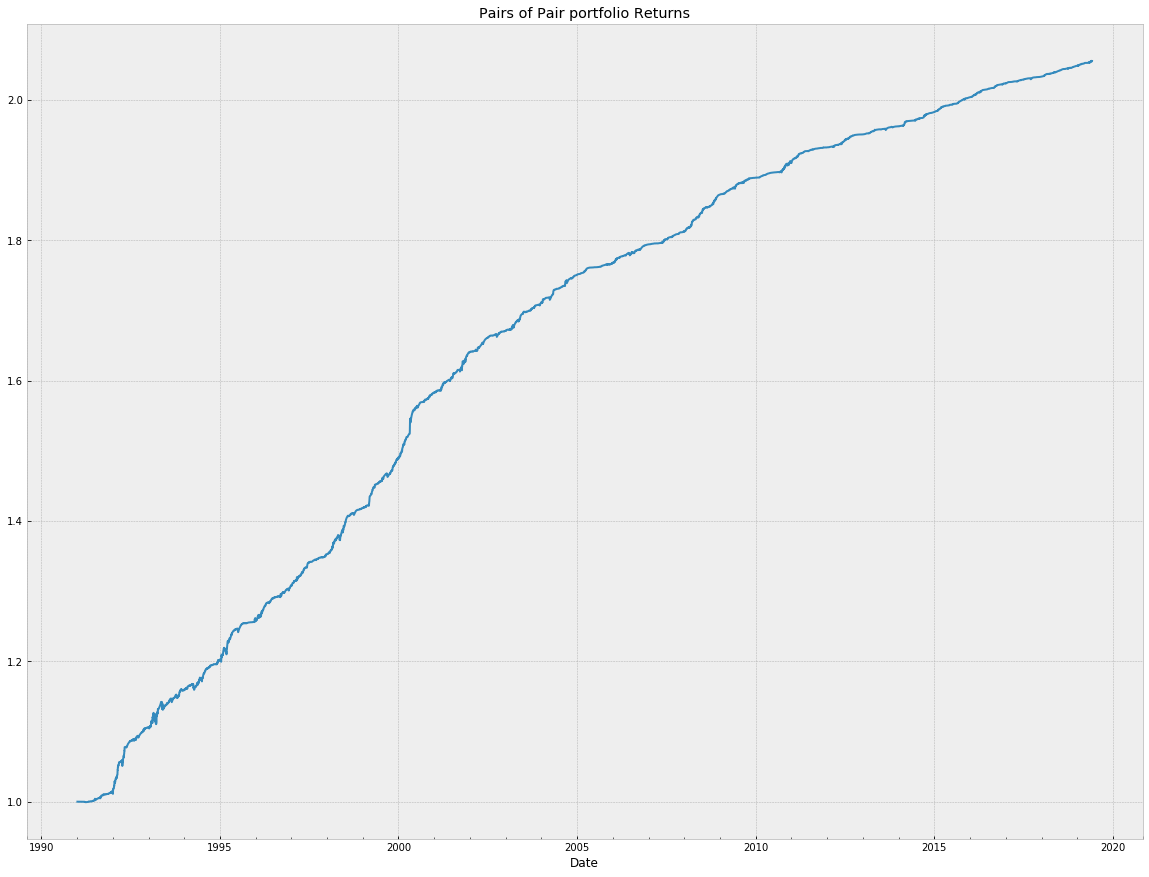

In [52]:
#concatenate together the individual equity curves into a single DataFrame
results_df = pd.concat(results,axis=1).dropna()

#equally weight each equity curve by dividing each by the number of pairs held in the DataFrame
results_df /= len(results_df.columns)

#sum up the equally weighted equity curves to get our final equity curve
final_res = results_df.sum(axis=1)

#plot the chart of our final equity curve
plot_ = final_res.plot(figsize=(20,15), title ='Pairs of Pair portfolio Returns')

fig_ = plot_.get_figure()
fig_.savefig("./plots/pairs_of_pair portfolio Returns.png")

In [53]:
sharpe = (final_res.pct_change().mean() / final_res.pct_change().std()) * (sqrt(252))
start_val = 1
end_val = final_res.iloc[-1]

start_date = final_res.index[0]
end_date = final_res.index[-1]

days = (end_date - start_date).days

CAGR = round(((float(end_val) / float(start_val)) ** (252.0/days)) - 1,4)
print("Sharpe Ratio is {} and CAGR is {}".format(round(sharpe,2),round(CAGR,4)))

Sharpe Ratio is 2.66 and CAGR is 0.0177


In [56]:
s =[4, 5, 6, 7, 4, 5, 6, 7]

In [54]:
np.mean([4, 5, 6, 7])

5.5

In [62]:
np.mean([4, 5, 6, 7,4,5])

5.166666666666667

In [57]:
pd.expanding_mean(s, 4)

AttributeError: module 'pandas' has no attribute 'expanding_mean'

In [58]:
kk = pd.DataFrame(s)

In [64]:
kk.expanding(1).mean()

,0
0,4.000000
1,4.500000
2,5.000000
3,5.500000
4,5.200000
5,5.166667
6,5.285714
7,5.500000


In [65]:
kk

,0
0,4
1,5
2,6
3,7
4,4
5,5
6,6
7,7
